[0.4, 0.3, 0.3]
[1, 0, 2, 'Other']
[0. 0. 0. 0.]


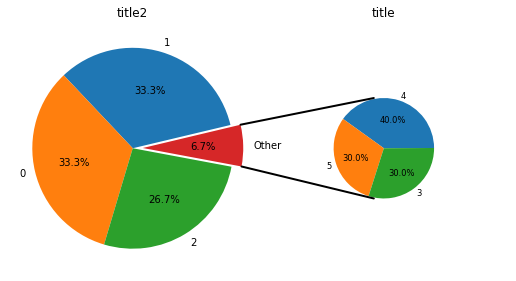

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import pandas as pd

from sklearn import datasets
iris = datasets.load_iris()
iris.target[140:143] = 3
iris.target[143:147] = 4
iris.target[147:150] = 5
iris.target
data = pd.Series(iris.target, index=[["A"]*50 + ["B"]*50 + ["C"]*40 + ["D"]*3 + ["E"]*4 + ["F"]*3])
lpie_title = "title2"
spie_title = "title"

def pie_of_pie(data, lpie_title, spie_title, split_threshold=20):
    '''
    Purpose: Creates a pie of pie chart
    
    Inputs:
    data: named series column
    lpie_title: string with large pie title
    spie_title: string with small pie title
    split_threshold: int with threshold for pie split
    
    Output: Pie of Pie chart
    '''
    
    def get_params(data, split_threshold):
        L = data.value_counts()
        L = data.value_counts()
        large_labels = L[L > split_threshold].index.tolist()
        lpie_labels = large_labels + ['Other']
        spie_labels = L[L <= split_threshold].index.tolist()
        lpie_vals = L[L > split_threshold].sum()
        spie_vals = L[L <= split_threshold].sum()
        total = lpie_vals + spie_vals
        L[L > split_threshold]/total
        lpie_ratios = list(L[L > split_threshold].tolist()/total) + [sum(L[L <= split_threshold].tolist())/total]
        mini_total = np.int64(sum(L[L <= split_threshold].tolist()))
        spie_ratios = list(L[L <= split_threshold].tolist()/mini_total)
        print(spie_ratios)
        return(tuple([lpie_ratios, lpie_labels, spie_ratios, spie_labels]))
    
    lpie_ratios, lpie_labels, spie_ratios, spie_labels = get_params(data, split_threshold)
    #make figure and assign axis objects
    fig = plt.figure(figsize=(9, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.subplots_adjust(wspace=0)
    
    m = len(lpie_labels)
    m = m-1
    #large pie chart parameters
    ratios = lpie_ratios
    labels = lpie_labels
    print(labels)
    explode = np.zeros(m+1)
    print(explode)
    explode[m] = 0.1
    #rotate so that first wedge is split by the x-axis
    angle = ratios[m] - (360 - ratios[m]*100*2)
    ax1.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, explode=explode)
    
    #small pie chart parameters
    ratios = spie_ratios
    labels = spie_labels
    n = len(spie_ratios) - 1
    angle = ratios[n]
    width = .2
    
    ax2.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, radius=0.5, textprops={'size':'smaller'})
    
    ax1.set_title(lpie_title)
    ax2.set_title(spie_title)
    
    #use ConnectionPatch to draw lines between the two plots
    #get the wedge data
    theta1, theta2 = ax1.patches[m].theta1, ax1.patches[m].theta2
    center, r = ax1.patches[m].center, ax1.patches[m].r
    
    #draw top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(- width / 2, 0.5), xyB=(x, y),
                         coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(2)
    
    #draw bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(- width / 2, -.5), xyB=(x, y), coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(2)
    
    plt.show()
    
pie_of_pie(data, lpie_title, spie_title, split_threshold=6)